# Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 

    
    AUTHOR: Dr. Roy Jafari 

# Chapter 5: Picking up the right tool 

## Challenge 4: Gradient Descent

In this challenge, we will explore the Gradient Descent algorithm and acquire the tools necessary to use this algorithm efficiently.

1. The code snippet below defines a function `system()`, which simulates a system whose optimum performance we aim to find. This function helps illustrate the concept of Gradient Descent.

```
import time
def system(x):
    time.sleep(0.1)
    return 2*x**2 - 100*x + 15000
```

The `time.sleep(0.1)` call in the function simulates the delay that might occur in a real-world system, such as waiting for a response from a sensor or processing a complex calculation. This addition helps to create a more realistic scenario where each function evaluation takes time, similar to what might happen in practical applications. This function models a quadratic equation, allowing us to practice finding the minimum value using Gradient Descent.

In [90]:
import time
def system(x):
    time.sleep(0.1)
    return 2*x**2 - 100*x + 15000

2. Use the derivative to find the optimum of the quadratic function defined in `system()`.



**Answer**: 

$$y = 2x^2-100x+1500$$ 

To calculate the minimum:


$$\frac{\mathrm d}{\mathrm d x} \left( y \right) = 4x-100 = 0$$

$$x = \frac{\mathrm 100}{\mathrm 4}=25$$ 

3. The following code defines `drawSysPoint()`, a function that takes in a mathematical function, a range of x-values, and a specific x-value (point). It then plots the function and projects the given point onto the function. Define this function and run `drawSysPoint(system, (0, 50), 10)` to use it.

```
import numpy as np
import matplotlib.pyplot as plt

def drawSysPoint(func, xlim, p):
    x = np.linspace(xlim[0], xlim[1], 50)
    y = func(x)
    
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Function')
    ax.scatter(p, func(p), marker='*', color='C1', s=75, label=f'Point (x={p:.2f})')
    ax.axvline(p, linestyle=':', linewidth=1, color='gray')
    ax.annotate(text=f'x={p:.2f}',xy=(p,func(1)))
    
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    
    plt.show()

# Example usage
drawSysPoint(system, (0, 50), 10)
```

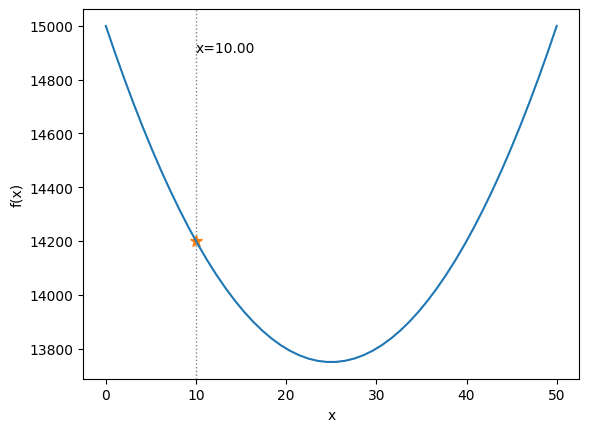

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def drawSysPoint(func, xlim, p):
    x = np.linspace(xlim[0], xlim[1], 50)
    y = func(x)
    
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Function')
    ax.scatter(p, func(p), marker='*', color='C1', s=75, label=f'Point (x={p:.2f})')
    ax.axvline(p, linestyle=':', linewidth=1, color='gray')
    ax.annotate(text=f'x={p:.2f}',xy=(p,func(1)))
    
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    
    plt.show()

# Example usage
drawSysPoint(system, (0, 50), 10)

4. The following code snippet defines two functions: `extract_tangent_line()` and `drawSysPointwTangentLine()`. The first function calculates the slope and intercept of the tangent line at a given point on a function. The second function plots the function and its tangent line at the given point.

```
import numpy as np
import matplotlib.pyplot as plt

def extract_tangent_line(func, p):
    eps = 1e-6
    x1 = p + eps
    y1 = func(x1)
    
    x2 = p - eps
    y2 = func(x2)
    
    slope = (y2 - y1) / (x2 - x1)
    intercept = func(p) - slope * p
    
    return slope, intercept, lambda x: intercept + slope * x

def drawSysPointwTangentLine(func, p):
    xlim = (0, 50)
    x = np.linspace(xlim[0], xlim[1], 50)
    y = func(x)
    
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Function')
    ax.scatter(p, func(p), marker='*', color='C1', s=75, label=f'Point (x={p:.2f})')
    ax.axvline(p, linestyle=':', linewidth=0.5, color='gray')
    ax.annotate(text=f'x={p:.2f}',xy=(p,func(1)))
    
    slope, intercept, tangent_line_func = extract_tangent_line(func, p)
    tangent_xlim = (p - 5, p + 5)
    x_tangent = np.linspace(tangent_xlim[0], tangent_xlim[1], 50)
    y_tangent = tangent_line_func(x_tangent)
    ax.plot(x_tangent, y_tangent, linestyle=':', color='gray', label='Tangent Line')
    ax.annotate(text =f'slope: {slope:.2f}',xy=(p+1,func(p)))
    
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    
    plt.show()

# Example usage
drawSysPointwTangentLine(system, 10)
```

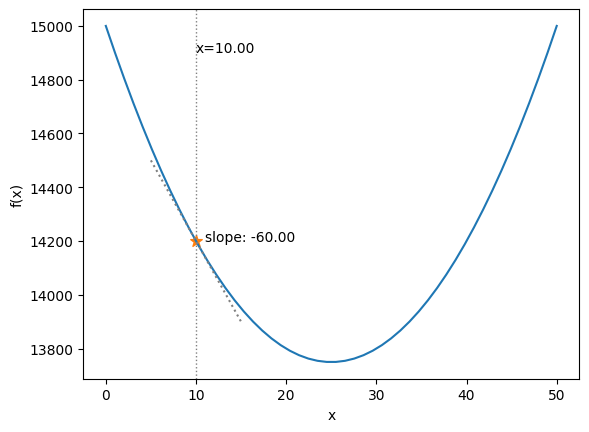

-60.00000034816594

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def extract_tangent_line(func, p):
    eps = 1e-6
    x1 = p + eps
    y1 = func(x1)
    
    x2 = p - eps
    y2 = func(x2)
    
    slope = (y2 - y1) / (x2 - x1)
    intercept = func(p) - slope * p
    
    return slope, intercept, lambda x: intercept + slope * x

def drawSysPointwTangentLine(func, p):
    xlim = (0, 50)
    x = np.linspace(xlim[0], xlim[1], 50)
    y = func(x)
    
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Function')
    ax.scatter(p, func(p), marker='*', color='C1', s=75, label=f'Point (x={p:.2f})')
    ax.axvline(p, linestyle=':', linewidth=1, color='gray')
    ax.annotate(text=f'x={p:.2f}',xy=(p,func(1)))
    
    slope, intercept, tangent_line_func = extract_tangent_line(func, p)
    tangent_xlim = (p - 5, p + 5)
    x_tangent = np.linspace(tangent_xlim[0], tangent_xlim[1], 50)
    y_tangent = tangent_line_func(x_tangent)
    ax.plot(x_tangent, y_tangent, linestyle=':', color='gray', label='Tangent Line')
    ax.annotate(text =f'slope: {slope:.2f}',xy=(p+1,func(p)))
    
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    
    plt.show()
    return slope

# Example usage
drawSysPointwTangentLine(system, 10)

5. We will use `drawSysPointwTangentLine()` extensively. Let's use it with various points between 0 and 50 to better understand its functionality.

```
# Example usage with different points between 0 and 50
points = [8,22, 28, 41]

for p in points:
    print(drawSysPointwTangentLine(system, p))
```

You can run this code to visualize how `drawSysPointwTangentLine()` behaves with different points. This will help you understand how the function and its tangent line change as the point varies within the range.

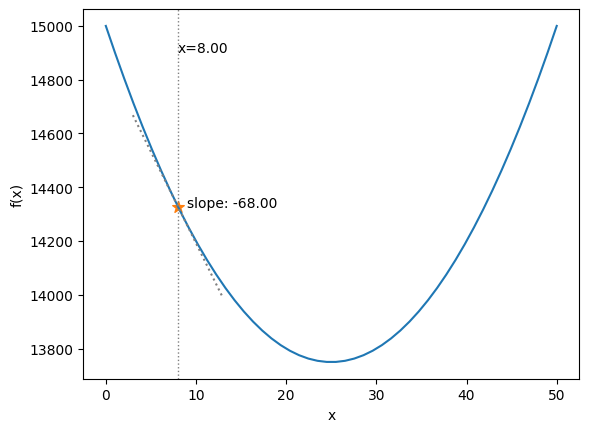

-67.99999939426232


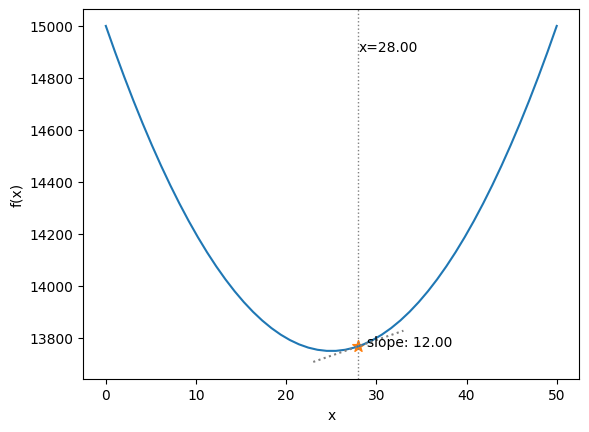

12.000000412114787


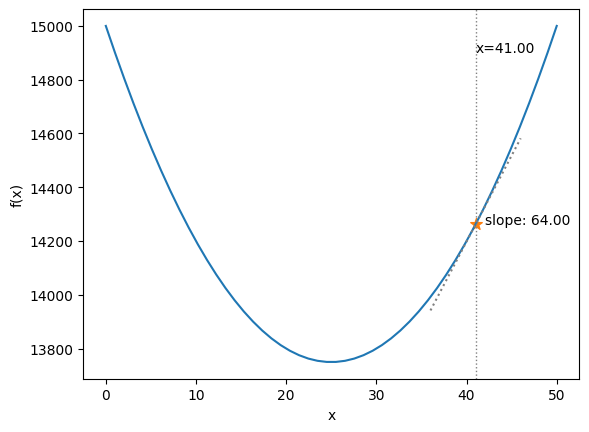

64.0


In [93]:
# Example usage with different points between 0 and 50
points = [8, 28, 41]

for p in points:
    print(drawSysPointwTangentLine(system, p))

6. Note that the `drawSysPointwTangentLine()` function also returns the slope of the tangent line to the input `func`. The following code uses this slope to iteratively move the input toward the extreme point of the `system()` function. Run the code a few times and observe the printouts. Notice how, regardless of the random starting point, the algorithm converges to the optimum answer, which is \( x = 25 \). Why does this work?

```
point = np.random.randint(50)

for i in range(20):
    slope = drawSysPointwTangentLine(system, point)  # Extract only the slope
    point = point - slope * 0.1
    print(f"Iteration {i+1}: point = {point:.2f}, slope = {slope:.2f}")

print(f"Converged to: x = {point:.2f}")
```

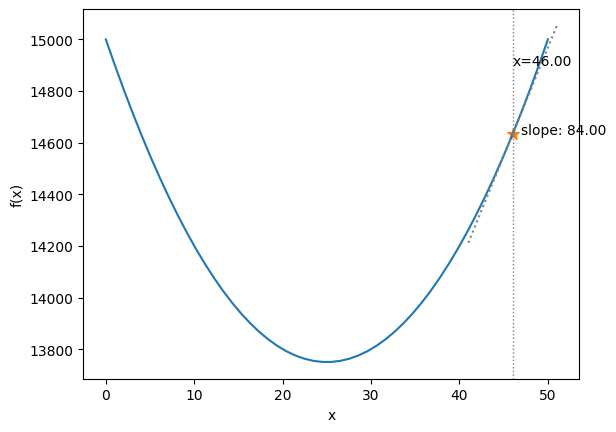

Iteration 1: point = 37.60, slope = 84.00


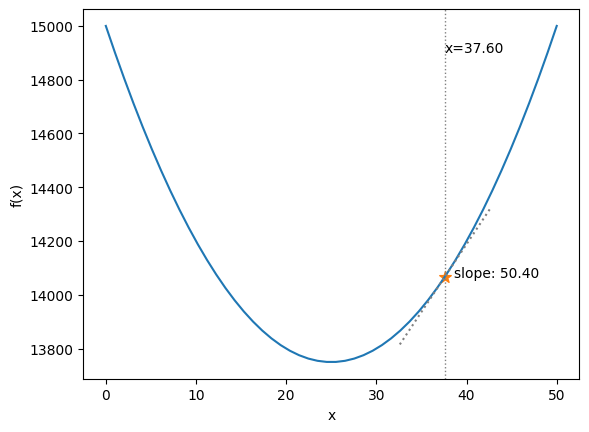

Iteration 2: point = 32.56, slope = 50.40


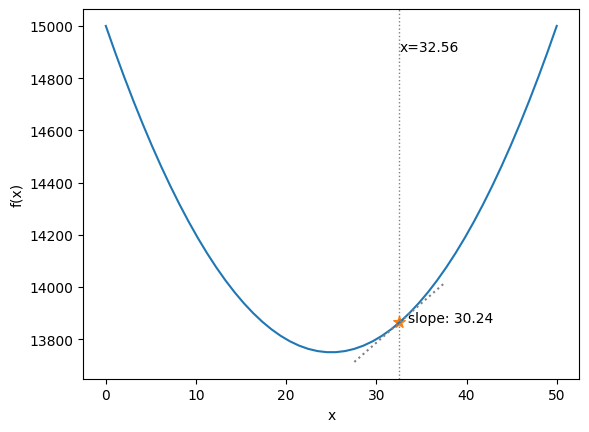

Iteration 3: point = 29.54, slope = 30.24


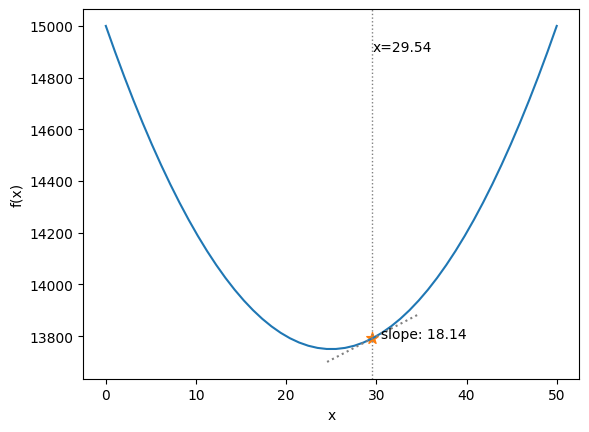

Iteration 4: point = 27.72, slope = 18.14


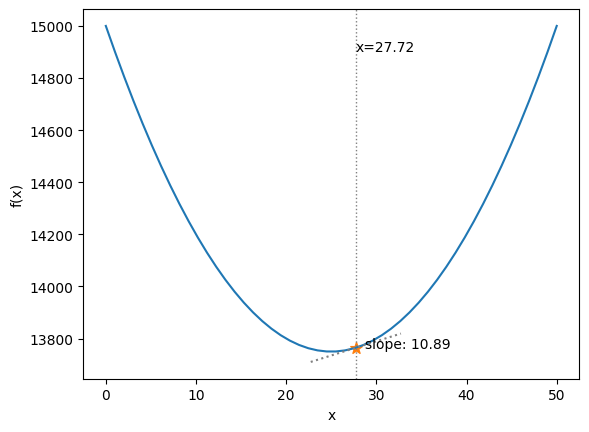

Iteration 5: point = 26.63, slope = 10.89


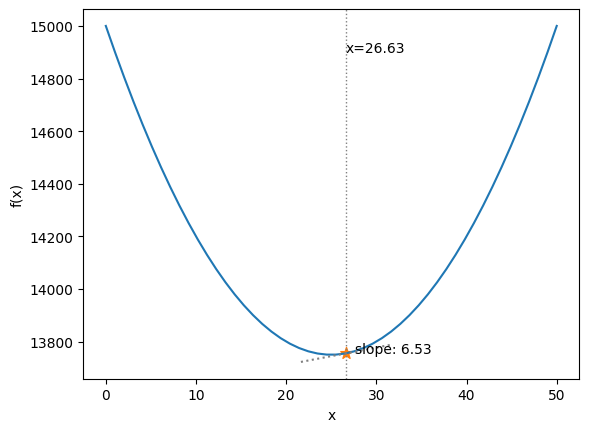

Iteration 6: point = 25.98, slope = 6.53


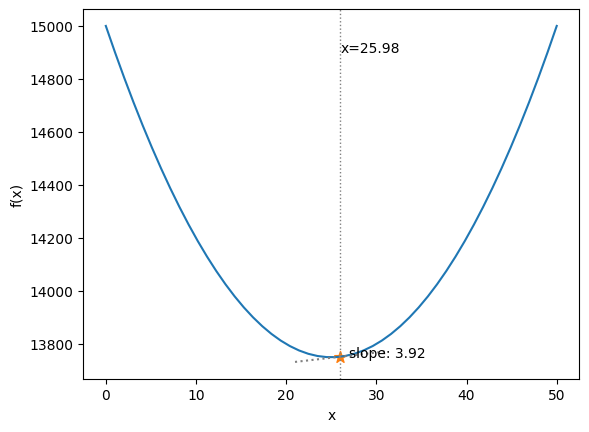

Iteration 7: point = 25.59, slope = 3.92


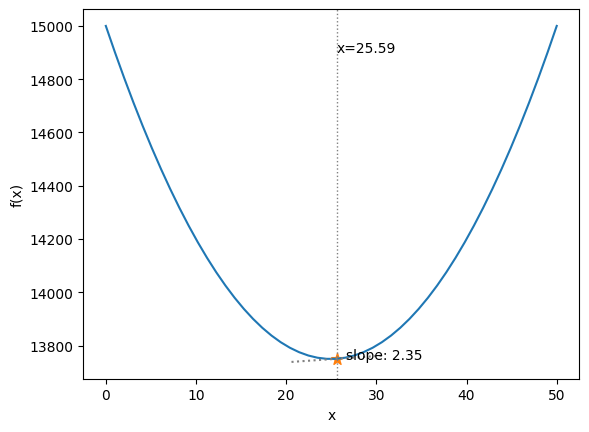

Iteration 8: point = 25.35, slope = 2.35


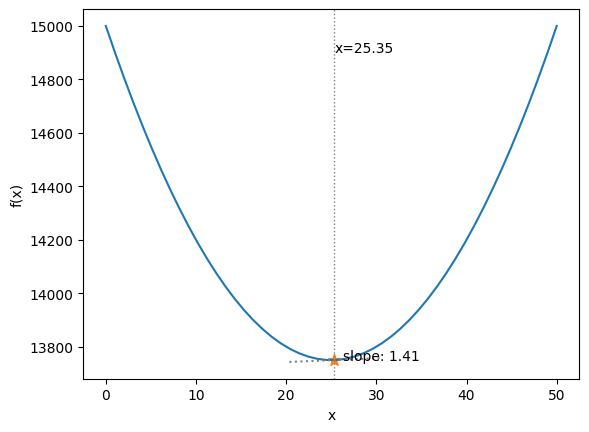

Iteration 9: point = 25.21, slope = 1.41


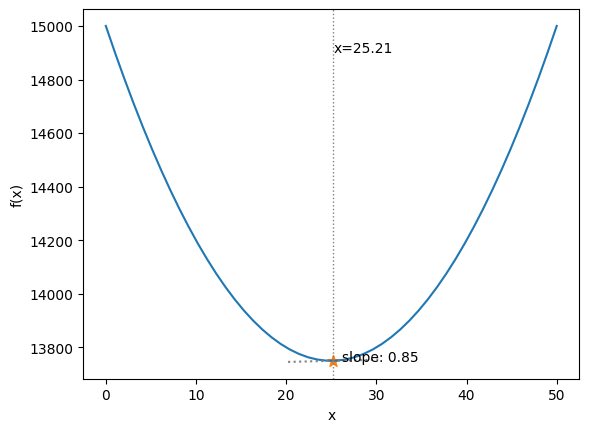

Iteration 10: point = 25.13, slope = 0.85


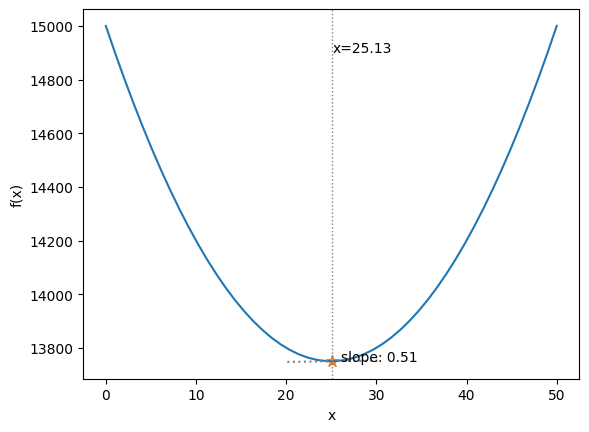

Iteration 11: point = 25.08, slope = 0.51


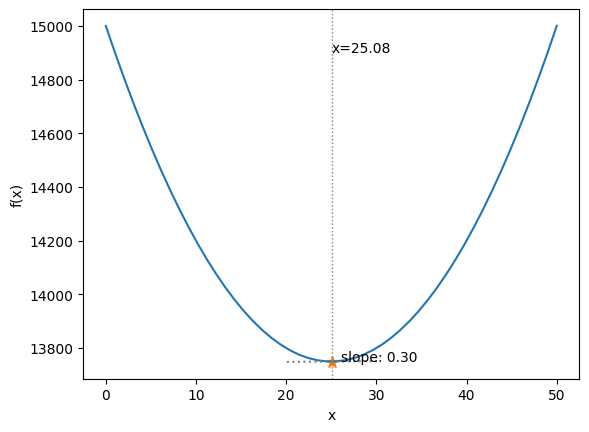

Iteration 12: point = 25.05, slope = 0.30


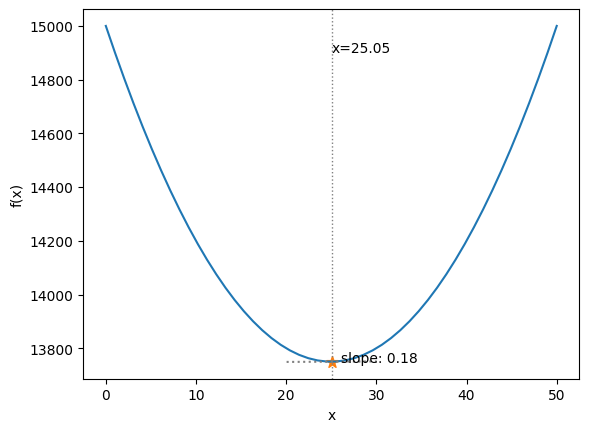

Iteration 13: point = 25.03, slope = 0.18


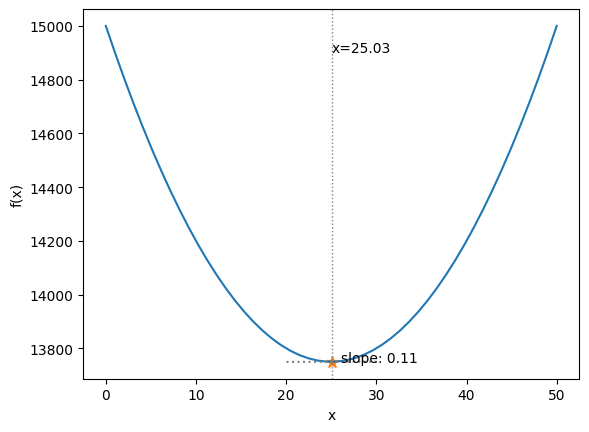

Iteration 14: point = 25.02, slope = 0.11


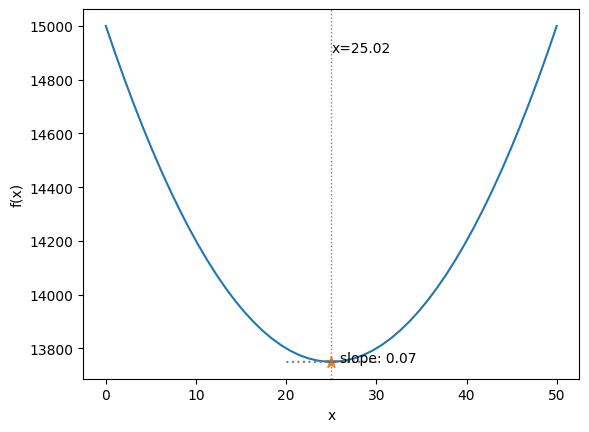

Iteration 15: point = 25.01, slope = 0.07


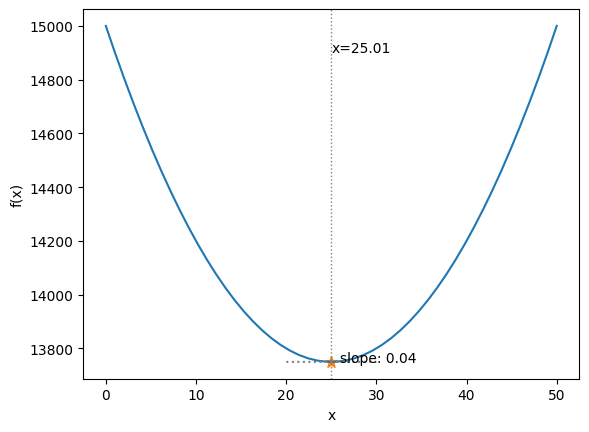

Iteration 16: point = 25.01, slope = 0.04


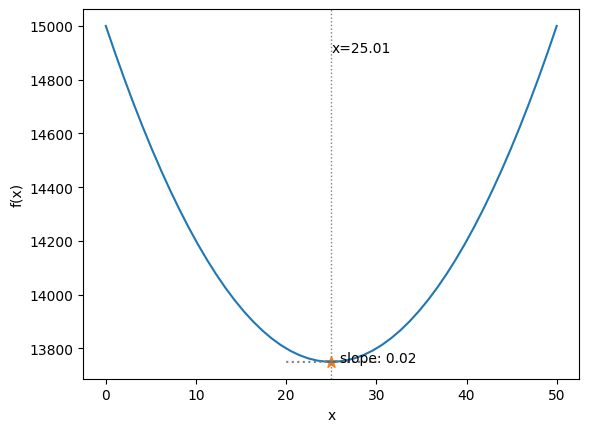

Iteration 17: point = 25.00, slope = 0.02


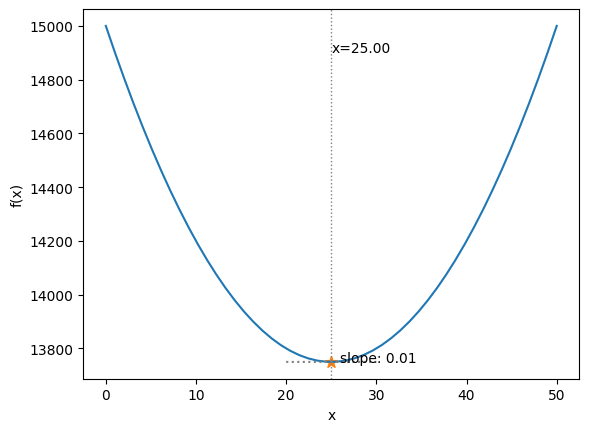

Iteration 18: point = 25.00, slope = 0.01


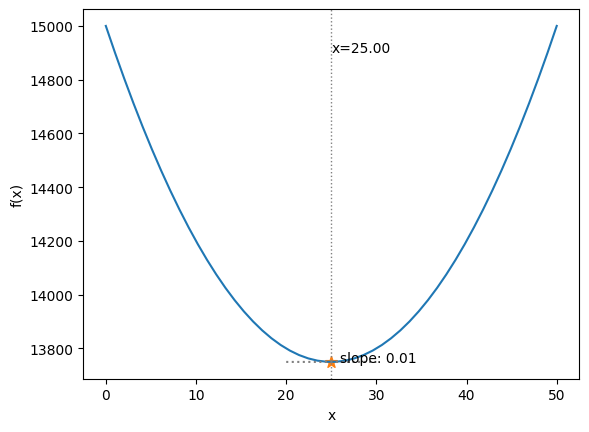

Iteration 19: point = 25.00, slope = 0.01


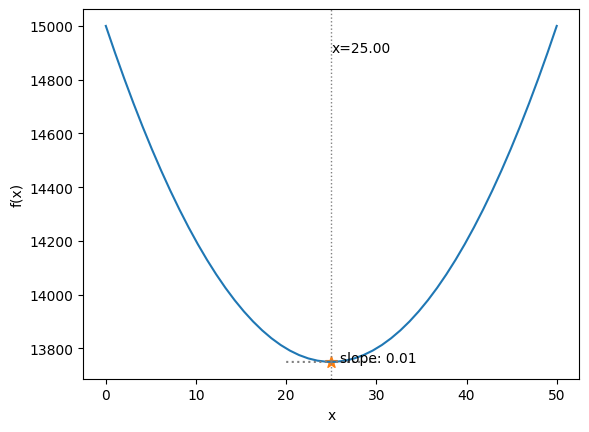

Iteration 20: point = 25.00, slope = 0.01
Converged to: x = 25.00


In [94]:
point = np.random.randint(50)

for i in range(20):
    slope = drawSysPointwTangentLine(system, point)  # Extract only the slope
    point = point - slope * 0.1
    print(f"Iteration {i+1}: point = {point:.2f}, slope = {slope:.2f}")

print(f"Converged to: x = {point:.2f}")

**Answer**: This works because the algorithm is essentially performing Gradient Descent. The slope of the tangent line at a given point indicates the direction and rate of change of the function. By iteratively updating the point in the opposite direction of the slope, the algorithm converges to the local minimum. In this case, the local minimum of the quadratic function defined by `system()` is at \( x = 25 \). Gradient Descent is a widely used optimization algorithm that works by repeatedly moving towards the minimum value based on the gradient (slope) of the function.

7. What we observed in the previous steps demonstrates how Gradient Descent works. Based on your observation, come up with an algorithm for Gradient Descent in simple terms.
   
**Answer**:

Gradient Descent is an optimization algorithm used to find the minimum or maximum value of a function. Here’s how it works, step by step:

1. **Initialize**: Start with a random point on the function. This point is often chosen randomly or based on some heuristic.

2. **Calculate the Gradient**: Compute the slope (or gradient) of the function at the current point. The gradient indicates the direction of the steepest ascent (or descent).

3. **Update the Point**: Move the point in the opposite direction of the gradient. The amount you move is controlled by a parameter called the learning rate. This step ensures you move towards the minimum value of the function.

4. **Repeat**: Repeat the process of calculating the gradient and updating the point until the change in the function value between iterations is very small (or for a set number of iterations). This indicates that you have reached the minimum value (or are very close to it).

5. **Convergence**: The algorithm converges when the updates to the point are very small, indicating that the minimum value has been reached.

In summary, Gradient Descent works by iteratively moving towards the minimum value of a function by following the direction of the steepest descent, as indicated by the gradient.

8. The following code compares the performance of Gradient Descent with a 0.1 learning rate against a naive trial-and-error method with a 0.1 increment. Run the following code and summarize your observations.

```
import numpy as np
import time

## Naive method
t0 = time.time()

candidates = np.linspace(0, 50, 501)
answers = []
for c in candidates:
    answers.append(system(c))

answers = np.array(answers)
optimum_naive = candidates[answers == answers.min()]
time_naive = time.time() - t0
print(f'Optimum answer found by Naive Method is {optimum_naive} and it took {time_naive:.2f} seconds.')

## Gradient Descent
t0 = time.time()
point = np.random.randint(50)

for i in range(20):
    slope, intercept, tangent_line_func = extract_tangent_line(system, point)
    point = point - slope * 0.1

optimum_gd = point
time_gd = time.time() - t0
print(f'Optimum answer found by Gradient Descent is {optimum_gd:.2f} and it took {time_gd:.2f} seconds.')
```

In [104]:
## Naive method
t0 = time.time()

candidates = np.linspace(0,50,501)
answers = []
for c in candidates:
    answers.append(system(c))
    
answers = np.array(answers)
otimum = candidates[answers == answers.min()]
time_it_took = time.time() - t0
print(f'optimum answer found by Naive Method is {otimum} and it took {time_it_took} seconds.')

## Gradient Descent
t0 = time.time()
point = np.random.randint(50)

for i in range(20):
    slope, intercept, tangent_line_func = extract_tangent_line(system, p)
    point = point - slope * 0.1
    time_it_took = time.time() - t0
print(f'optimum answer found by Gradient Descent is {otimum} and it took {time_it_took} seconds.')

optimum answer found by Naive Method is [25.] and it took 52.01331305503845 seconds.
optimum answer found by Gradient Descent is [25.] and it took 6.187675952911377 seconds.


**Answer**:

1. **Naive Method**:
   - The naive method iterates through a range of candidate points (from 0 to 50, in increments of 0.1), evaluating the function at each point.
   - It then identifies the point with the minimum function value.
   - This method took a certain amount of time (e.g., a few seconds) to find the optimum value.

2. **Gradient Descent**:
   - The Gradient Descent method starts from a random point and iteratively moves towards the minimum by updating the point in the opposite direction of the slope of the tangent line.
   - This method took a different amount of time, usually less than the naive method, to find the optimum value (e.g., fractions of a second).

**Summary**:

- The naive method is straightforward but computationally expensive, especially for large ranges or fine increments. It evaluates the function at every possible point within the range.
- Gradient Descent, on the other hand, is more efficient. It uses the slope to direct the search towards the minimum, resulting in fewer evaluations and faster convergence.
- Despite starting from a random point, Gradient Descent consistently converges to the optimum value, demonstrating its robustness and efficiency for optimization problems.
- The `time.sleep(0.1)` delay in the `system` function makes the differences in efficiency more apparent, as the naive method's exhaustive search takes significantly longer compared to the directed approach of Gradient Descent.

9. Write a conclusion for yourself so you'd always know when using Gradient Descent is a better optimization tool.

**Answer**:

Gradient Descent is a powerful optimization tool that is particularly effective in the following scenarios:

1. **Large Search Spaces**: When the function has a large range or high-dimensional input space, the naive method of evaluating every possible point becomes computationally infeasible. Gradient Descent efficiently narrows down the search by following the gradient.

2. **Continuous and Differentiable Functions**: Gradient Descent works best on functions that are continuous and differentiable, as it relies on calculating the gradient (slope) to guide the search for the minimum.

3. **Efficiency and Speed**: When time and computational resources are limited, Gradient Descent provides a faster alternative to exhaustive search methods. It converges more quickly to the optimum by taking directed steps rather than evaluating all points.

4. **Real-Time and Adaptive Systems**: In systems that require real-time optimization or adaptive learning, Gradient Descent can dynamically adjust parameters and converge to the optimal solution without the need for pre-computing all possible outcomes.

However, Gradient Descent might not be suitable in the following cases:

1. **Non-Convex Functions**: For functions with multiple local minima, Gradient Descent can get stuck in a local minimum rather than finding the global minimum. Techniques like simulated annealing or genetic algorithms might be more appropriate in such cases.

2. **Discontinuous or Non-Differentiable Functions**: When the function is not smooth or has discontinuities, Gradient Descent cannot reliably calculate the gradient, making it less effective.

3. **Extremely Flat or Steep Regions**: In functions with very flat regions (small gradients) or steep regions (large gradients), the convergence rate of Gradient Descent can be slow or unstable. Adjusting the learning rate or using advanced variants like Adam or RMSprop can help mitigate these issues.

In summary, use Gradient Descent when dealing with large, continuous, and differentiable functions where computational efficiency is crucial. Avoid it for non-convex, discontinuous, or highly irregular functions where other optimization methods might perform better.